### Superstore Data Set

Contexto

Con las crecientes demandas y las feroces competencias en el mercado, un gigante de las supertiendas busca su conocimiento para comprender qué funciona mejor para ellos. Les gustaría saber a qué productos, regiones, categorías y segmentos de clientes deben dirigirse o evitar.

Incluso puede ir un paso más allá e intentar crear un modelo de regresión para predecir las ventas o los beneficios.

In [2]:
#Librerías básicas
import pandas as pd
import numpy as np 


In [3]:
#Librerías básicas
import pandas as pd
import numpy as np 
#Librerías de Visualización
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Imputación de nulos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


pd.set_option('display.max_columns', None)

In [4]:
from urllib.request import urlopen
import json

### Descripción de campos

- **row_id**: Identificador único de la fila. Utilizado para distinguir cada fila del dataset.
  
- **order_id**: Identificador único del pedido. Cada pedido tiene su propio ID para facilitar el seguimiento.
  
- **order_date**: Fecha en que se realizó el pedido.
  
- **ship_date**: Fecha en que el pedido fue enviado.('Second Class', 'Standard Class', 'First Class', 'Same Day')
  
- **ship_mode**: Modo de envío del pedido (por ejemplo, envío estándar, urgente, etc.).
  
- **customer_id**: Identificador único del cliente que realizó el pedido.
  
- **customer_name**: Nombre del cliente que realizó el pedido.
  
- **segment**: Segmento de mercado al que pertenece el cliente ('Consumer', 'Corporate', 'Home Office').
  
- **country**: País desde donde se realizó el pedido.
  
- **city**: Ciudad desde donde se realizó el pedido.
  
- **state**: Estado o provincia desde donde se realizó el pedido.
  
- **postal_code**: Código postal del cliente o de la ubicación del envío.
  
- **region**: Región geográfica o de mercado donde se realizó el pedido.
  
- **product_id**: Identificador único del producto en el pedido.
  
- **category**: Categoría a la que pertenece el producto ('Furniture', 'Office Supplies', 'Technology').
  
- **sub-category**: Subcategoría dentro de la categoría principal del producto. ('Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper','Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines','Copiers')
  
- **product_name**: Nombre del producto.
  
- **sales**: Monto de las ventas generadas por el pedido.
  
- **quantity**: Cantidad de productos pedidos.
  
- **discount**: Descuento aplicado en el pedido (generalmente expresado como porcentaje o monto).
  
- **profit**: Ganancia obtenida por el pedido, calculada después de aplicar los costos y descuentos.


In [5]:
df=pd.read_csv(r'C:\Users\maria\Documents\FormacionDataAnalytics\EDA_Superstore\superstore_limpio.csv', index_col=0)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,contact_year,contact_month
0,1,CA-2016-152156,2016-11-08,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,8
1,2,CA-2016-152156,2016-11-08,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,8
2,3,CA-2016-138688,2016-06-12,2016-06-12,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,12
3,4,US-2015-108966,2015-10-11,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,11
4,5,US-2015-108966,2015-10-11,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11


In [6]:
df.shape

(9994, 23)

In [7]:
# Podria hacer un df con las ganacias para separa las negativas de las positivas

# Hacer un conteo de pedido para ver que producto se ha pedido mas, con segmento y categoria, 

# estudio de los descuentos, que productos tienen mayor descuesto, para ellos desglosar el campo de beneficio para ver el costo

In [8]:
non_profitable_order =df.loc[df['profit']<0].shape[0]
print(f'La cantidad de pedidos con rentabilidad negativa son:{non_profitable_order} pedidos')

La cantidad de pedidos con rentabilidad negativa son:1871 pedidos


## ¿Qué categoría de productos genera los mayores ingresos y beneficios?

In [9]:
df_category_profit=df.groupby('category')['profit'].sum().reset_index()
df_category_profit['%_profit_category']= (df_category_profit['profit'] / df_category_profit['profit'].sum()) * 100
df_category_profit

,category,profit,%_profit_category
0,Furniture,18451.2728,6.442551
1,Office Supplies,122490.8008,42.769579
2,Technology,145454.9481,50.787870


In [10]:
df_category_sales=df.groupby('category')['sales'].sum().reset_index()
df_category_sales['%_profit_category']= (df_category_sales['sales'] / df_category_sales['sales'].sum()) * 100

In [11]:


pie = px.pie(df_category_profit, names= 'category', values='profit',
             color = ['Furniture', 'Office Supplies', 'Technology'],
             color_discrete_map = {'Furniture': '#30BFDD',
                                   'Office Supplies': '#8690FF',
                                   'Technology': '#ACD0F4'})
pie.update_layout(title = dict(text = "Distribución de beneficios por categorías", 
															 font = dict(size = 20),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.5,
															 y = 1),
							    legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
pie.show()

### Margén de beneficio promedio por categoría de producto

In [12]:
df['margen_beneficio_promedio'] = (df['profit'].sum() / df['sales'].sum()) * 100
df_promedio_profit= df.groupby('category')['margen_beneficio_promedio'].sum().reset_index()
df_promedio_profit

,category,margen_beneficio_promedio
0,Furniture,26442.967767
1,Office Supplies,75127.451090
2,Technology,23026.950243


## Distribución del beneficio por subcategorías 

In [13]:
df_subcategory=df.groupby('sub-category')['profit'].sum().sort_values(ascending=False).reset_index()

In [14]:
df_subcategory['%_profit_subcategory']= (df_subcategory['profit'] / df_subcategory['profit'].sum()) * 100

In [15]:
px.colors.named_colorscales()

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

In [16]:
fig= px.bar(df_subcategory, x= 'sub-category', y='profit', color='profit',color_continuous_scale = 'blugrn',
            
            )
fig.update_layout(title = dict(text = "Distribución de beneficios por subcategorías", 
															 font = dict(size = 20),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.5,
															 y = 1))
fig.show()


### ¿Qué subcategoría de productos tiene mayor demanada?

In [17]:
df_subcategory_count= df.groupby('sub-category')['order_id'].count().sort_values(ascending=False).reset_index()
df_subcategory_count

,sub-category,order_id
0,Binders,1523
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846
5,Art,796
6,Accessories,775
7,Chairs,617
8,Appliances,466
9,Labels,364


In [18]:
fig= px.bar(df_subcategory_count, x= 'sub-category', y='order_id', color='order_id',color_continuous_scale = 'blugrn',
            
            )
fig.update_layout(title = dict(text = "Ranking de demanda por subcategorías", 
															 font = dict(size = 20),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.5,
															 y = 1))
fig.show()

## Distribución del beneficio por región y ciudades.

In [19]:
df_region=df.groupby('region')['profit'].sum().reset_index()
df_region['%_profit_region']= (df_region['profit'] / df_region['profit'].sum()) * 100

In [20]:
df_city=df.groupby('city')['profit'].sum().sort_values(ascending=False).reset_index().head(10)
df_city['%_profit_city']= (df_city['profit'] / df_city['profit'].sum()) * 100

In [21]:
fig = px.bar(df_city,x= 'city', y='profit',  text_auto=True, color='profit',color_continuous_scale = 'blugrn')
             
fig.show()

In [22]:
# Filtrar ciudades con beneficio negativo
citynonprofit = df_city[df_city['profit'] < 0]['city'].nunique()

# Contar el número total de ciudades
total_cities = df_city['city'].nunique()

# Calcular el porcentaje de ciudades con beneficio negativo
negativecity_percentage = (citynonprofit / total_cities) * 100

print(f"El porcentaje de ciudades con beneficio negativo es: {negativecity_percentage:.2f}%")


El porcentaje de ciudades con beneficio negativo es: 0.00%


In [23]:
fig = px.pie(df_region, names= 'region', values='profit',
             color = ['West', 'East', 'Technology', 'Central' ],
             color_discrete_map = {'West': '#30BFDD',
                                   'East': '#8690FF',
                                   'South': '#ACD0F4',
                                   'Central':'#F7C0BB'})
fig.update_layout(title = dict(text = "Distribución de beneficios por región", 
															 font = dict(size = 20),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.5,
															 y = 1),
							    legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
fig.show()

### ¿Qúe región genera más ventas?

In [24]:
df_sales_region= df.groupby('region')['sales'].count().reset_index()
df_sales_region

,region,sales
0,Central,2323
1,East,2848
2,South,1620
3,West,3203


In [25]:
fig = px.bar(df_sales_region,x= 'region', y='sales',  text_auto=True, color='sales',color_continuous_scale = 'blugrn')
             
fig.show()

## Distribución del benefición según el segmento

In [26]:
df_segment=df.groupby('segment')['profit'].sum().reset_index()

In [27]:
df_segment['%_profit_segment']= (df_segment['profit'] / df_segment['profit'].sum()) * 100

In [28]:
df_segment.sort_values(by='profit', ascending= False)

,segment,profit,%_profit_segment
0,Consumer,134119.2092,46.829820
1,Corporate,91979.1340,32.115953
2,Home Office,60298.6785,21.054227


In [29]:
fig =px.pie(df_segment, names='segment', values='profit',
            color = ['Consumer', 'Corporate', 'Home Office'],
             color_discrete_map = {'Consumer': '#30BFDD',
                                   'Corporate': '#8690FF',
                                   'Home Office': '#ACD0F4'})



fig.update_layout(title = dict(text = "Distribución de beneficios por segmentos", 
															 font = dict(size = 20),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.5,
															 y = 1),
							    legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
fig.show()

In [30]:
df_nonprofit_tables = pd.DataFrame(df['sub-category']=='Tables').sum()
df_nonprofit_tables.head()

sub-category    319
dtype: int64

In [31]:
# Filtrar por 'Tables' y sumar la columna 'profit'
df_tables = df[df['sub-category'] == 'Tables' ]

# Mostrar el DataFrame resultante
df_tables= df_tables.loc[df_tables['profit']<0]

df_tables.shape

(203, 24)

In [32]:
# Agrupar por clientes y pedidos para saber las repeticiones de los clientes
df_tables.groupby('customer_id')['order_id'].count().reset_index()

,customer_id,order_id
0,AB-10105,1
1,AC-10420,1
2,AC-10615,1
3,AF-10870,1
4,AG-10330,1
...,...,...
173,VP-21760,1
174,VS-21820,1
175,VW-21775,1
176,WB-21850,1


## Productos más vendidos

In [33]:
df_top5_product=df.groupby('product_name')['sales'].count().sort_values(ascending=False).head(5).reset_index()

In [34]:
fig=px.bar(df_top5_product, x= 'product_name', y='sales', text_auto=True, color='sales',color_continuous_scale = 'blugrn')
         
fig.update_layout(title = dict(text = "Top 5 venta de productos", 
															 font = dict(size = 30),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.5,
															 y = 1))
fig.show()

##  Impacto de descuentos y promocines en las ventas

In [35]:
# Ventas promedio con descuento
sales_with_discount=df[df['discount']>0]['sales'].mean().round(2)
sales_without_discount=df[df['discount']==0]['sales'].mean().round(2)
print(f'Las ventas sin descuentos suma la cantidad de {sales_without_discount} y las ventas con descuento {sales_with_discount}')


Las ventas sin descuentos suma la cantidad de 226.74 y las ventas con descuento 232.74


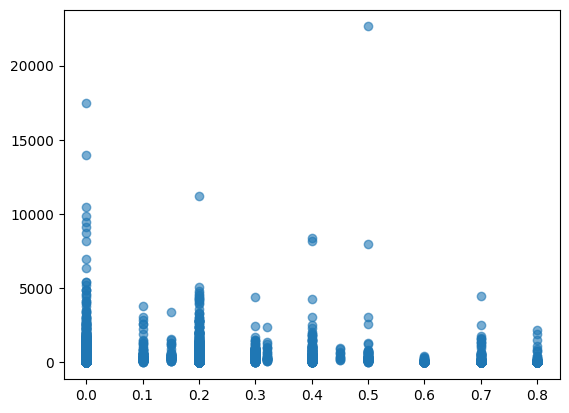

In [36]:

plt.scatter(df['discount'], df['sales'], alpha=0.6 )

In [37]:
import statsmodels.api as sm

# Variables independientes y dependientes
X = df[['discount']]  # Descuento como variable independiente
y = df['sales']  # Ventas como variable dependiente

# Añadir constante
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.947
Date:                Mon, 07 Oct 2024   Prob (F-statistic):            0.00483
Time:                        11:21:22   Log-Likelihood:                -78487.
No. Observations:                9994   AIC:                         1.570e+05
Df Residuals:                    9992   BIC:                         1.570e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.1511      7.815     31.113      0.0

##  Tendencias a lo largo del tiempo (mensual, anual)

In [38]:
df_sales_year=df.groupby('contact_year')['sales'].sum().reset_index()
df_profit_year=df.groupby('contact_year')['profit'].sum().reset_index()
df_sales_month=df.groupby('contact_month')['sales'].sum().reset_index()
df_profit_month=df.groupby('contact_month')['profit'].sum().reset_index()

C:\Users\maria\AppData\Local\Temp\ipykernel_18240\2796823821.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



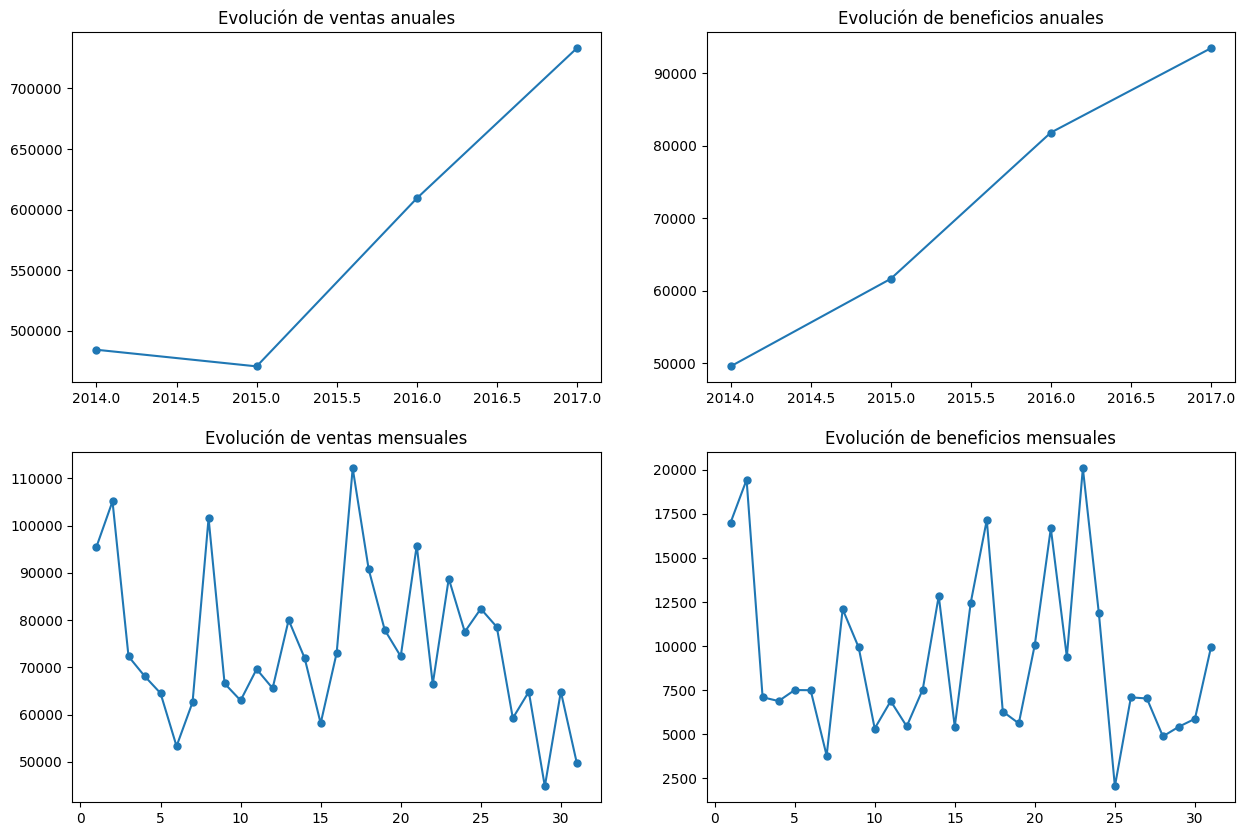

In [39]:
fig, ax= plt.subplots(nrows=2, ncols=2, figsize= (15,10))

ax[0,0].plot(df_sales_year['contact_year'], df_sales_year['sales'], marker = "o", markersize = 5)
ax[0,0].set_title('Evolución de ventas anuales')


ax[0,1].plot(df_profit_year['contact_year'], df_profit_year['profit'], marker = "o", markersize = 5)
ax[0,1].set_title('Evolución de beneficios anuales')

ax[1,0].plot(df_sales_month['contact_month'], df_sales_month['sales'], marker = "o", markersize = 5)
ax[1,0].set_title('Evolución de ventas mensuales')


ax[1,1].plot(df_profit_month['contact_month'], df_profit_month['profit'], marker = "o", markersize = 5)
ax[1,1].set_title('Evolución de beneficios mensuales')

fig.show() 
